# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


**Important: Restart the Kernel at this moment**

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="data",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(training_data,batch_size=32,shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data",train=False,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=32)

100%|██████████| 9.91M/9.91M [00:00<00:00, 56.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.74MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.23MB/s]


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?


I used ToTensor to convert the MNIST images into a format that the model can work with. I used Normalize to help speed up and improve the model training process because MNIST images are grayscale with one channel. It normalizes the pixel distribution to have a mean of zero and a standard deviation of one.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Image batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])
Image tensor dtype: torch.float32
Label tensor dtype: torch.int64
7


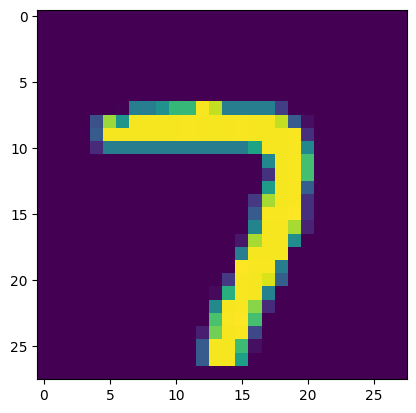

0


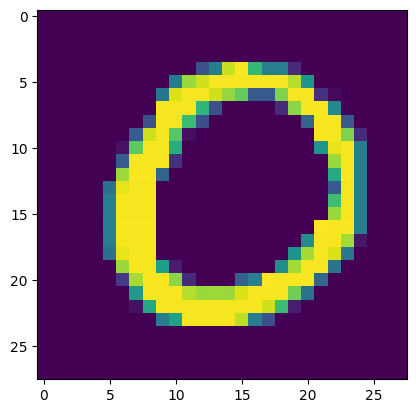

4


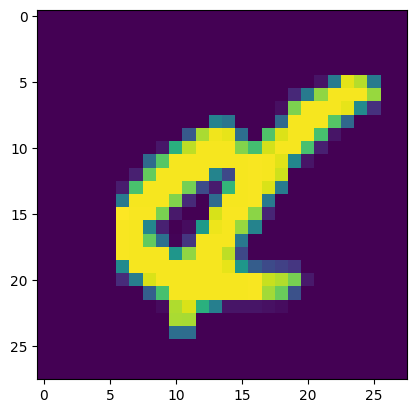

9


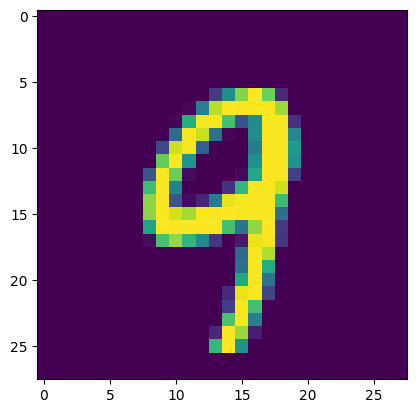

6


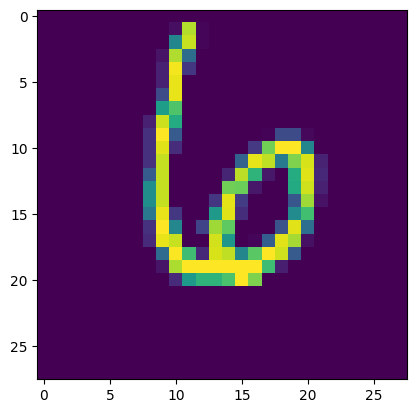

In [5]:
# Explore data
view_transform = transforms.ToTensor()

view_data = torchvision.datasets.MNIST(root="data",train=True,download=True,transform=view_transform)
view_loader = torch.utils.data.DataLoader(view_data,batch_size=32,shuffle=True)

dataiter = iter(view_loader)
images,labels = next(dataiter)

print("Image batch shape:",images.shape)
print("Labels batch shape:",labels.shape)
print("Image tensor dtype:",images.dtype)
print("Label tensor dtype:",labels.dtype)

show5(view_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
# Define the class for your neural network
class HandwrittenDigits(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)

  def forward(self,x):
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# Instantiate the model
model = HandwrittenDigits()
print(model)

HandwrittenDigits(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# choose an optimizer
optimizer = optim.Adam(model.parameters(),lr=0.001)

# choose a loss function
criterion= nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0
  train_correct = 0
  for i, data in enumerate(train_loader):
    inputs,labels = data

    inputs,labels = inputs.to(device),labels.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    _,preds = torch.max(outputs.data,1)
    train_correct += (preds == labels).float().mean().item()
    train_loss += loss.item()
  print(f'Epoch {epoch+1} Training Accuracy:{train_correct/len(train_loader)*100:.2f}% training Loss:{train_loss/len(train_loader):.5f}')
  train_loss_history.append(train_loss/len(train_loader))

  val_loss = 0.0
  val_correct = 0
  model.eval()
  for inputs,labels in test_loader:
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs,labels)

    _,preds = torch.max(outputs.data,1)
    val_correct += (preds==labels).float().mean().item()
    val_loss += loss.item()
  print(f'Epoch {epoch+1} Validation Accuracy:{val_correct/len(test_loader)*100:.2f}% validation Loss:{val_loss/len(test_loader):.5f}')
  val_loss_history.append(val_loss/len(test_loader))


Epoch 1 Training Accuracy:89.52% training Loss:0.34634
Epoch 1 Validation Accuracy:94.16% validation Loss:0.18880
Epoch 2 Training Accuracy:94.80% training Loss:0.16848
Epoch 2 Validation Accuracy:95.59% validation Loss:0.13536
Epoch 3 Training Accuracy:96.19% training Loss:0.12434
Epoch 3 Validation Accuracy:96.04% validation Loss:0.13293
Epoch 4 Training Accuracy:96.82% training Loss:0.10400
Epoch 4 Validation Accuracy:96.05% validation Loss:0.12906
Epoch 5 Training Accuracy:97.19% training Loss:0.08919
Epoch 5 Validation Accuracy:96.61% validation Loss:0.11507
Epoch 6 Training Accuracy:97.44% training Loss:0.07797
Epoch 6 Validation Accuracy:97.00% validation Loss:0.09704
Epoch 7 Training Accuracy:97.75% training Loss:0.07146
Epoch 7 Validation Accuracy:96.83% validation Loss:0.10475
Epoch 8 Training Accuracy:97.84% training Loss:0.06701
Epoch 8 Validation Accuracy:97.11% validation Loss:0.09388
Epoch 9 Training Accuracy:98.08% training Loss:0.05828
Epoch 9 Validation Accuracy:96.88

Plot the training loss (and validation loss/accuracy, if recorded).

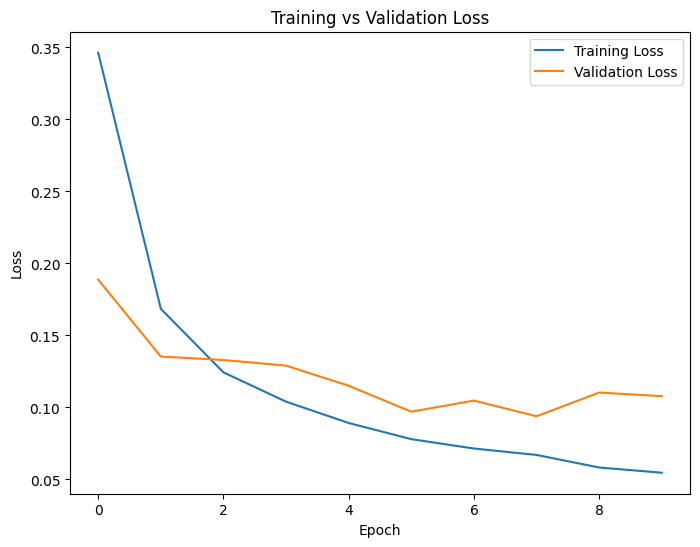

In [9]:
plt.figure(figsize=(8,6))
plt.plot(train_loss_history,label="Training Loss")
plt.plot(val_loss_history,label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
model.eval()
test_correct = 0

with torch.no_grad():
  for inputs ,labels in test_loader:
    inputs ,labels = inputs.to(device),labels.to(device)
    outputs = model(inputs)
    _,preds = torch.max(outputs,1)
    test_correct += (preds==labels).sum().item()

test_accuracy = test_correct/len(test_loader.dataset)*100
print(f"Test Accuracy:{test_accuracy:.2f}%")

Test Accuracy:97.13%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch 1 Training Accuracy:84.57% training Loss:0.49597
Epoch 1 Validation Accuracy:92.97% validation Loss:0.22043
Epoch 2 Training Accuracy:93.27% training Loss:0.22043
Epoch 2 Validation Accuracy:94.79% validation Loss:0.16504
Epoch 3 Training Accuracy:94.71% training Loss:0.17212
Epoch 3 Validation Accuracy:96.14% validation Loss:0.11938
Epoch 4 Training Accuracy:95.59% training Loss:0.14272
Epoch 4 Validation Accuracy:96.72% validation Loss:0.10597
Epoch 5 Training Accuracy:96.15% training Loss:0.12571
Epoch 5 Validation Accuracy:96.76% validation Loss:0.09994
Epoch 6 Training Accuracy:96.43% training Loss:0.11470
Epoch 6 Validation Accuracy:97.18% validation Loss:0.09178
Epoch 7 Training Accuracy:96.75% training Loss:0.10408
Epoch 7 Validation Accuracy:97.06% validation Loss:0.09395
Epoch 8 Training Accuracy:96.99% training Loss:0.09758
Epoch 8 Validation Accuracy:97.42% validation Loss:0.07782
Epoch 9 Training Accuracy:97.30% training Loss:0.08797
Epoch 9 Validation Accuracy:97.27

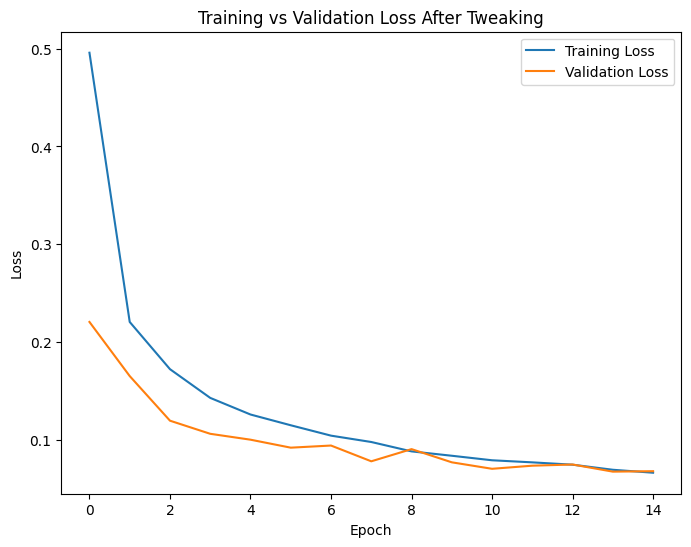

Test Accuracy:98.06%


In [12]:
# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="data",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(training_data,batch_size=64,shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data",train=False,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=64)

# Define the class for your neural network
class HandwrittenDigits(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
    self.droupout = nn.Dropout(0.2)

  def forward(self,x):
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = self.droupout(x)
    x = F.relu(self.fc2(x))
    x = self.droupout(x)
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

# Instantiate the model
model = HandwrittenDigits()


# choose an optimizer
optimizer = optim.Adam(model.parameters(),lr=0.0005)

# choose a loss function
criterion= nn.CrossEntropyLoss()

# Running Neural Network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 15
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0
  train_correct = 0
  for i, data in enumerate(train_loader):
    inputs,labels = data

    inputs,labels = inputs.to(device),labels.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    _,preds = torch.max(outputs.data,1)
    train_correct += (preds == labels).float().mean().item()
    train_loss += loss.item()
  print(f'Epoch {epoch+1} Training Accuracy:{train_correct/len(train_loader)*100:.2f}% training Loss:{train_loss/len(train_loader):.5f}')
  train_loss_history.append(train_loss/len(train_loader))

  val_loss = 0.0
  val_correct = 0
  model.eval()
  for inputs,labels in test_loader:
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs,labels)

    _,preds = torch.max(outputs.data,1)
    val_correct += (preds==labels).float().mean().item()
    val_loss += loss.item()
  print(f'Epoch {epoch+1} Validation Accuracy:{val_correct/len(test_loader)*100:.2f}% validation Loss:{val_loss/len(test_loader):.5f}')
  val_loss_history.append(val_loss/len(test_loader))


# Plot the training loss and validation loss/accuracy
plt.figure(figsize=(8,6))
plt.plot(train_loss_history,label="Training Loss")
plt.plot(val_loss_history,label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss After Tweaking")
plt.legend()
plt.show()


# testing model
model.eval()
test_correct = 0

with torch.no_grad():
  for inputs ,labels in test_loader:
    inputs ,labels = inputs.to(device),labels.to(device)
    outputs = model(inputs)
    _,preds = torch.max(outputs,1)
    test_correct += (preds==labels).sum().item()

test_accuracy = test_correct/len(test_loader.dataset)*100
print(f"Test Accuracy:{test_accuracy:.2f}%")


## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
torch.save(model.state_dict(),"MNIST_Handwritten_Digits.pth")